In [37]:
import os
import sys

from pathlib import Path
import pandas as pd
from src.config.project_paths import get_data_file_path
import matplotlib.pyplot as plt
import soundfile as sf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

notebook_path = os.path.abspath("__file__")
notebook_directory = os.path.dirname(notebook_path)
parent_directory = os.path.dirname(notebook_directory)
parent_parent_directory = os.path.dirname(parent_directory)

sys.path.append(parent_parent_directory)

In [3]:
data = pd.read_csv('../../data//vox1_vox1_meta.csv', sep='\t')

data_dev = data[data['set'] == 'dev']
data_test = data[data['set'] == 'test'] 

In [110]:
data

,user_id,user_name,gender,nationality,set
0,id10001,A.J._Buckley,m,Ireland,dev
1,id10002,A.R._Rahman,m,India,dev
2,id10003,Aamir_Khan,m,India,dev
3,id10004,Aaron_Tveit,m,USA,dev
4,id10005,Aaron_Yoo,m,USA,dev
...,...,...,...,...,...
1246,id11247,Zachary_Levi,m,USA,dev
1247,id11248,Zachary_Quinto,m,USA,dev
1248,id11249,Zack_Snyder,m,USA,dev
1249,id11250,Zoe_Saldana,f,USA,dev


In [4]:
def count_users_and_nationalitis(df):
    df_dict = {}
    df_dict['count users'] = len(df)
    df_dict['count f'] = len(df[df['gender']=='f'])
    df_dict['count m'] = len(df[df['gender']=='m'])
    df_dict['number of nationalits'] = df['nationality'].nunique()
    return df_dict


dev_dict = count_users_and_nationalitis(data_dev)
test_dict = count_users_and_nationalitis(data_test)
data_dict = count_users_and_nationalitis(data)

df = pd.DataFrame([dev_dict, test_dict, data_dict], index=['dev', 'test', 'dev_test'])
df

,count users,count f,count m,number of nationalits
dev,1211,546,665,35
test,40,15,25,9
dev_test,1251,561,690,36


In [5]:
pivot_table = pd.pivot_table(data, index='gender', columns='nationality', aggfunc='size', fill_value=0)

pivot_table

nationality,Australia,Austria,Brazil,Canada,Chile,China,Croatia,Denmark,France,Germany,...,South Africa,South Korea,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Trinidad and Tobago,UK,USA
gender,,,,,,,,,,,,,,,,,,,,,
f,12,1,1,25,1,1,1,2,1,5,...,0,1,2,1,0,4,0,1,88,368
m,25,0,0,29,2,1,2,1,0,4,...,1,0,2,0,1,1,3,0,127,431


In [6]:
# Tworzenie tabeli przestawnej (pivot table) zliczającą liczbę mężczyzn i kobiet według narodowości
pivot_table = pd.pivot_table(data, index='nationality', columns='gender', aggfunc='size', fill_value=0)

pivot_table

gender,f,m
nationality,,
Australia,12,25
Austria,1,0
Brazil,1,0
Canada,25,29
Chile,1,2
China,1,1
Croatia,1,2
Denmark,2,1
France,1,0


___


In [130]:
ANNOTATION_PATH: Path = get_data_file_path("annotations_with_metadata.json")

annotation_df = pd.read_json(ANNOTATION_PATH, orient="records")

In [131]:
from scipy.io import wavfile


def calculate_audio_properties(row):
    samplerate, audio = wavfile.read(row['wav_path'])
    duration = len(audio) / samplerate
    max_amplitude = max(np.abs(audio))
    avg_amplitude = np.mean(np.abs(audio))
    return pd.Series([duration, avg_amplitude, max_amplitude])


In [ ]:
annotation_df[['duration', 'avg amplitude', 'max amplitude']] = annotation_df.apply(calculate_audio_properties, axis=1)


In [70]:
annotation_df

,wav_path,user_id,split,user_name,gender,nationality,set,duration,amplitude,avg amplitude,max amplitude
0,/Users/jjaniak/Documents/studia/biometria/proj...,id10295,train,Eric_Dane,m,USA,test,4.800063,569.880028,569.880028,7444.0
1,/Users/jjaniak/Documents/studia/biometria/proj...,id10295,train,Eric_Dane,m,USA,test,7.840063,1332.111471,1332.111471,8855.0
2,/Users/jjaniak/Documents/studia/biometria/proj...,id10295,train,Eric_Dane,m,USA,test,8.840063,1123.600915,1123.600915,8827.0
3,/Users/jjaniak/Documents/studia/biometria/proj...,id10295,train,Eric_Dane,m,USA,test,4.240062,1149.621144,1149.621144,8731.0
4,/Users/jjaniak/Documents/studia/biometria/proj...,id10295,train,Eric_Dane,m,USA,test,13.480063,953.741697,953.741697,9251.0
...,...,...,...,...,...,...,...,...,...,...,...
153511,/Users/jjaniak/Documents/studia/biometria/proj...,id10905,test,Pablo_Schreiber,m,USA,dev,6.160063,449.407484,449.407484,5479.0
153512,/Users/jjaniak/Documents/studia/biometria/proj...,id10905,test,Pablo_Schreiber,m,USA,dev,4.640062,437.323703,437.323703,6164.0
153513,/Users/jjaniak/Documents/studia/biometria/proj...,id10905,test,Pablo_Schreiber,m,USA,dev,4.200062,357.919257,357.919257,6658.0
153514,/Users/jjaniak/Documents/studia/biometria/proj...,id10905,test,Pablo_Schreiber,m,USA,dev,5.600062,474.321883,474.321883,6640.0


In [103]:
dev_data = annotation_df[annotation_df['set'] == 'dev']
test_data = annotation_df[annotation_df['set'] == 'test']

In [104]:
display(dev_data.groupby('user_id').size().describe())
display(test_data.groupby('user_id').size().describe())

count    1211.000000
mean      122.743187
std        77.902902
min        45.000000
25%        69.000000
50%       102.000000
75%       148.000000
max      1002.000000
dtype: float64

count     40.000000
mean     121.850000
std       65.542529
min       48.000000
25%       71.500000
50%       95.500000
75%      162.750000
max      304.000000
dtype: float64

In [105]:
display(dev_data.describe())
display(test_data.describe())

,duration,amplitude,avg amplitude,max amplitude
count,148642.000000,148642.000000,148642.000000,148642.000000
mean,8.244137,1091.418583,1091.418583,13782.136953
std,5.298526,878.897886,878.897886,7859.567238
min,3.960062,23.431312,23.431312,320.000000
25%,4.920063,519.519585,519.519585,7713.000000
50%,6.480062,849.596853,849.596853,12094.000000
75%,9.520062,1376.947526,1376.947526,18323.000000
max,144.920063,12653.307288,12653.307288,32767.000000


,duration,amplitude,avg amplitude,max amplitude
count,4874.000000,4874.000000,4874.000000,4874.000000
mean,8.275598,988.102389,988.102389,13165.088839
std,5.737056,679.824281,679.824281,6833.406942
min,3.960062,86.614853,86.614853,1402.000000
25%,4.880063,561.230248,561.230248,8125.250000
50%,6.480062,849.120395,849.120395,11926.000000
75%,9.400063,1200.788433,1200.788433,16525.750000
max,69.040063,8058.025154,8058.025154,32767.000000


In [ ]:

dev_data = annotation_df[annotation_df['set'] == 'dev']
test_data = annotation_df[annotation_df['set'] == 'test']   


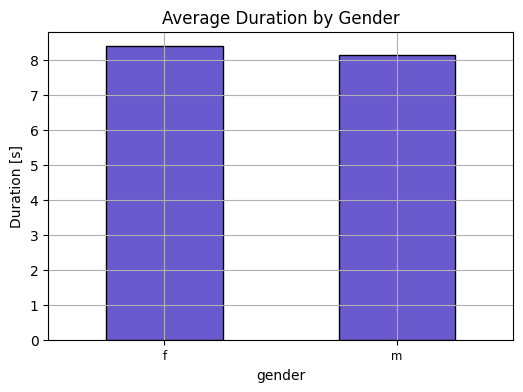

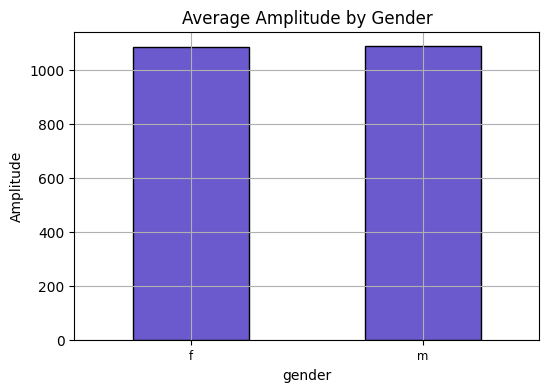

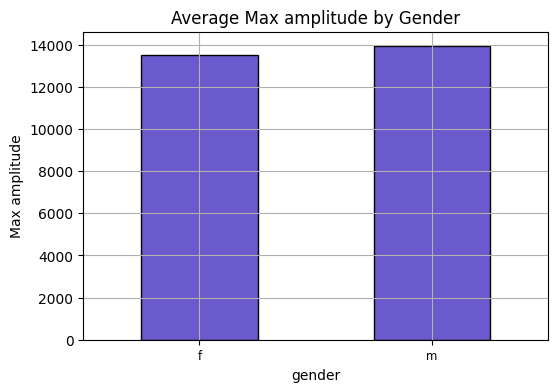

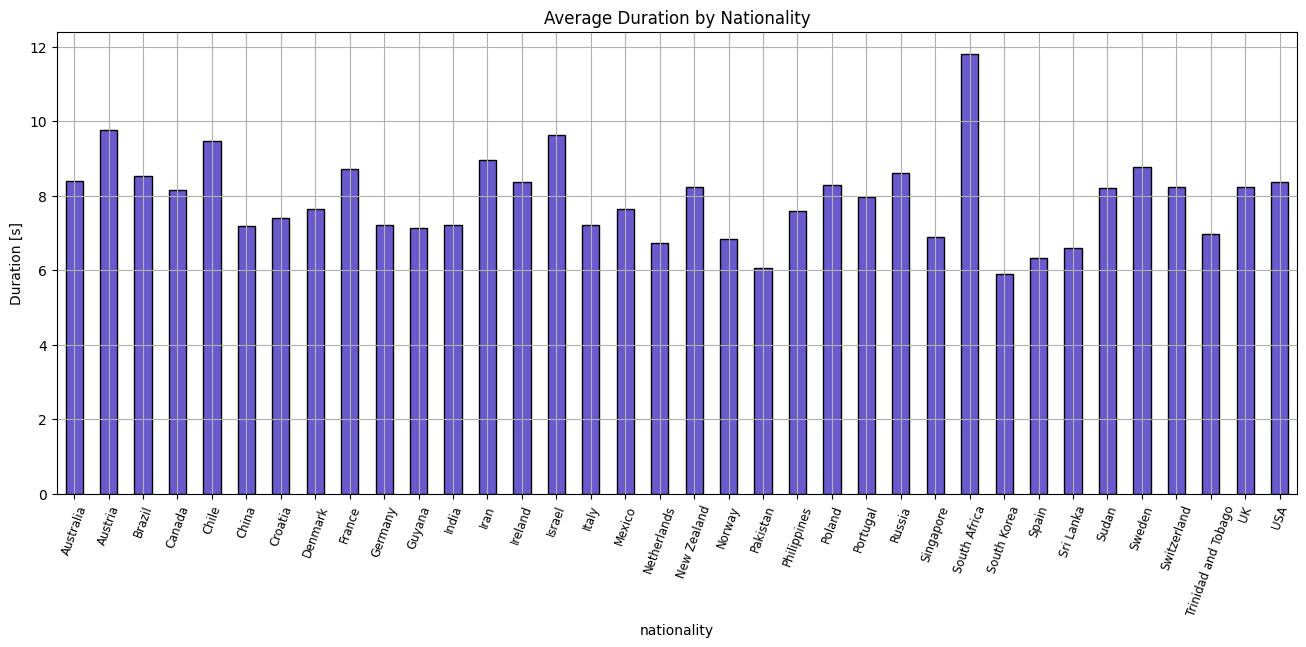

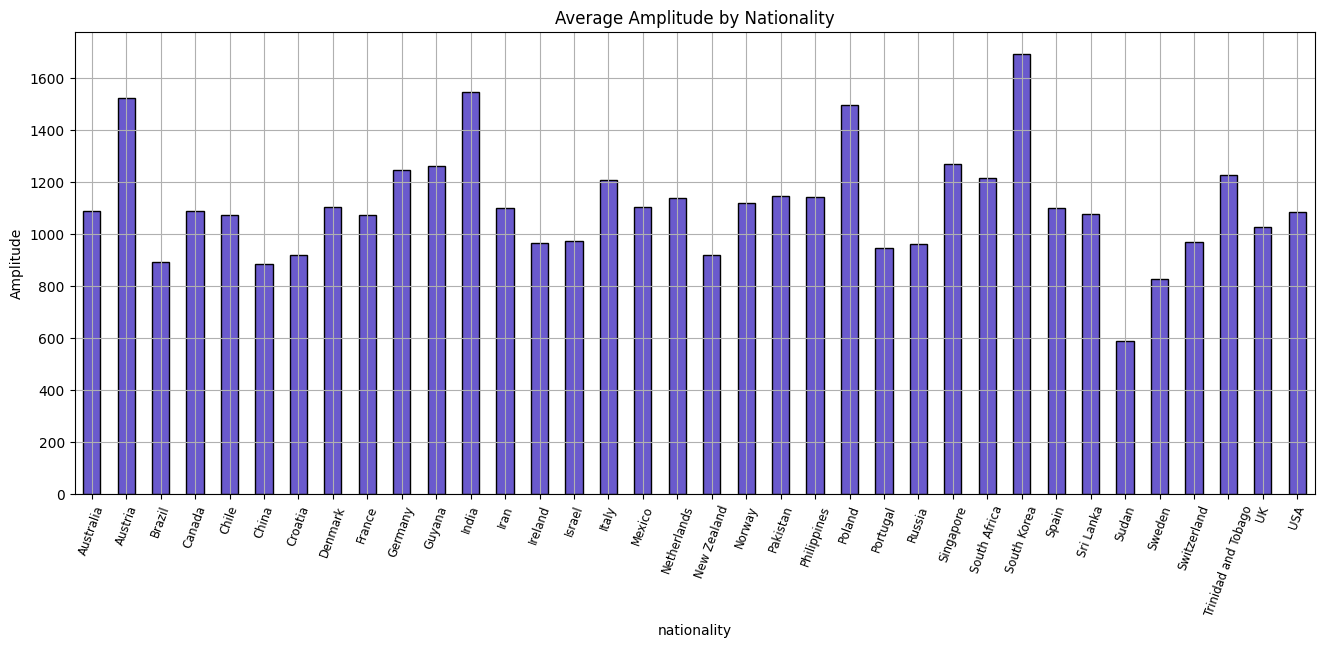

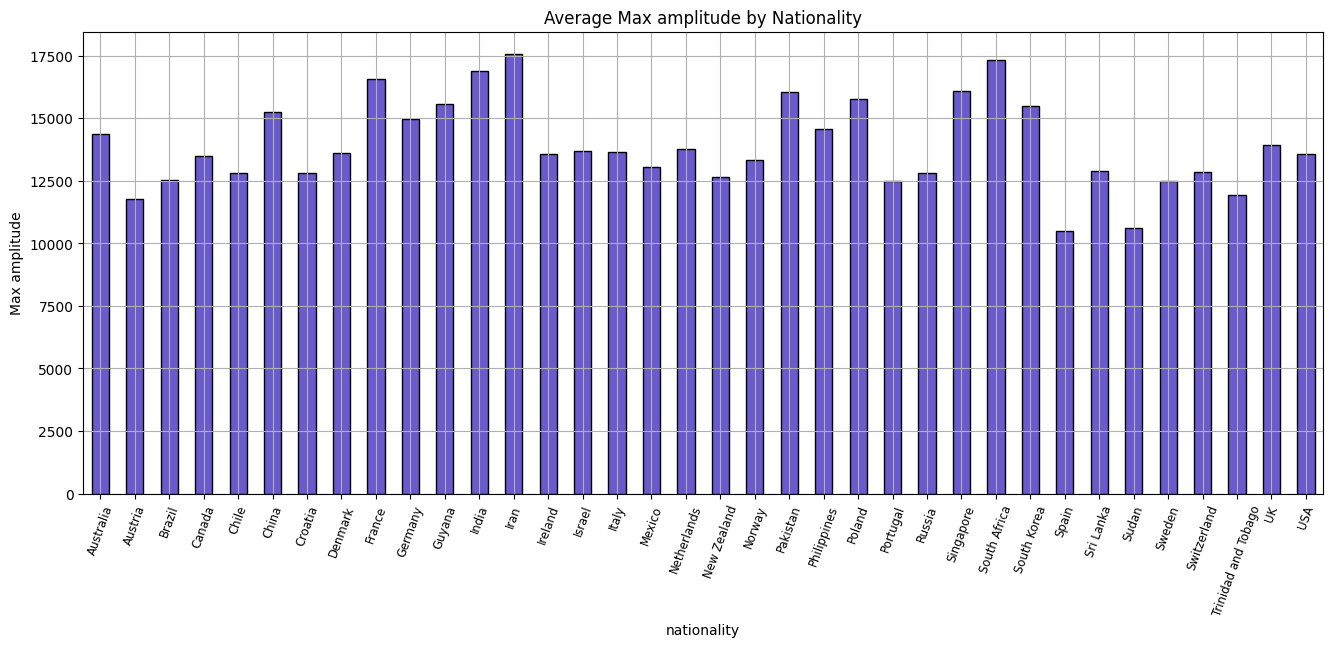

In [108]:
# Analyze duration and amplitude by gender and nationality
for column in ['gender', 'nationality']:
    for metric in ['duration', 'amplitude', 'max amplitude']:
        figsize = (16, 6) if column == 'nationality' else (6, 4)
        rotation = 70 if column == 'nationality' else 0
        plt.figure(figsize=figsize)
        annotation_df.groupby(column)[metric].mean().plot(kind='bar', color='slateblue', edgecolor='black')
        plt.title(f'Average {metric.capitalize()} by {column.capitalize()}')
        plt.ylabel(metric.capitalize() + ' [s]' if metric == 'duration' else metric.capitalize())
        plt.xticks(rotation=rotation, size='small')
        plt.grid(True)
        plt.show()

## vox 2

In [133]:
ANNOTATION_PATH: Path = get_data_file_path("annotations_voxceleb2.json")

annotation_df_vox2 = pd.read_json(ANNOTATION_PATH, orient="records")

In [142]:
import audioread
import numpy as np

def calculate_audio_properties(row):
    with audioread.audio_open(row['wav_path']) as f:
        samplerate = f.samplerate
        audio_array = np.hstack([np.frombuffer(buf, np.int16) for buf in f])
    duration = len(audio_array) / samplerate
    avg_amplitude = np.mean(np.abs(audio_array))
    return pd.Series([duration, avg_amplitude])


annotation_df_vox2[['duration', 'avg amplitude']] = annotation_df_vox2.apply(calculate_audio_properties, axis=1)

In [148]:
annotation_df_vox2.groupby('user_id').size().describe()

count    118.000000
mean     307.093220
std      152.506185
min       21.000000
25%      175.500000
50%      312.000000
75%      445.750000
max      500.000000
dtype: float64

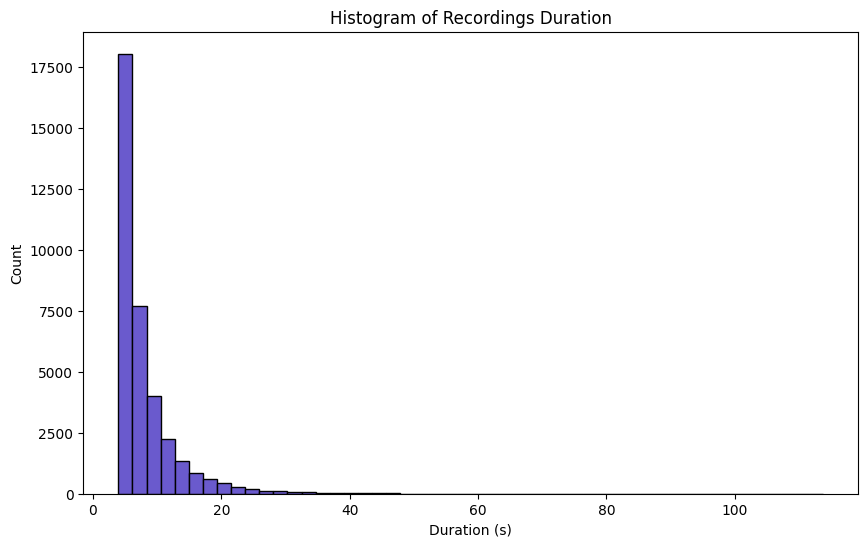

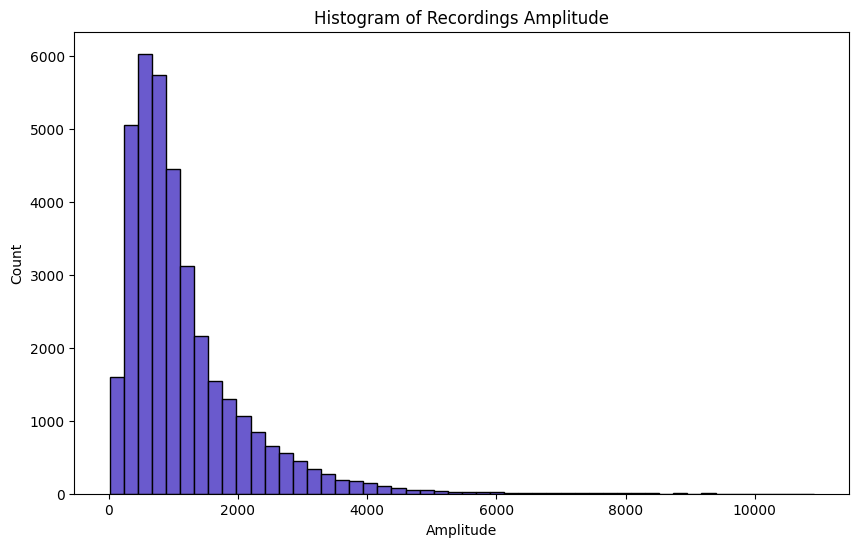

In [146]:
# Plot histogram of durations
plt.figure(figsize=(10, 6))
plt.hist(annotation_df_vox2['duration'], bins=50, color='slateblue', edgecolor='black')
plt.title('Histogram of Recordings Duration')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.show()

# Plot histogram of amplitudes
plt.figure(figsize=(10, 6))
plt.hist(annotation_df_vox2['avg amplitude'], bins=50, color='slateblue', edgecolor='black')
plt.title('Histogram of Recordings Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Count')
plt.show()
